In [1]:
!pip install pandas numpy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [4]:
df.drop(['availability','society','area_type','balcony'],axis='columns', inplace=True)

In [5]:
df.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [6]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df1 = df.dropna()
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df1['bhk'] = df1['size'].apply(lambda x: x.split(' ')[0])
df1.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13820\3423761853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bhk'] = df1['size'].apply(lambda x: x.split(' ')[0])


location       size total_sqft  bath   price bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07   2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00   4
2               Uttarahalli      3 BHK       1440   2.0   62.00   3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00   3
4                  Kothanur      2 BHK       1200   2.0   51.00   2

In [10]:
df1.drop(['size'], axis = 'columns', inplace= True)
df1.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13820\336363628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['size'], axis = 'columns', inplace= True)


location total_sqft  bath   price bhk
0  Electronic City Phase II       1056   2.0   39.07   2
1          Chikka Tirupathi       2600   5.0  120.00   4
2               Uttarahalli       1440   2.0   62.00   3
3        Lingadheeranahalli       1521   3.0   95.00   3
4                  Kothanur       1200   2.0   51.00   2

In [11]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [12]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
df1[~df1['total_sqft'].apply(isfloat)].head()

location   total_sqft  bath    price bhk
30            Yelahanka  2100 - 2850   4.0  186.000   4
122              Hebbal  3067 - 8156   4.0  477.000   4
137  8th Phase JP Nagar  1042 - 1105   2.0   54.005   2
165            Sarjapur  1145 - 1340   2.0   43.490   2
188            KR Puram  1015 - 1540   2.0   56.800   2

In [14]:
def total_sqft_conv(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
df2 = df1.copy()
df2['total_sqft']=df1['total_sqft'].apply(total_sqft_conv)
df2.head()

location  total_sqft  bath   price bhk
0  Electronic City Phase II      1056.0   2.0   39.07   2
1          Chikka Tirupathi      2600.0   5.0  120.00   4
2               Uttarahalli      1440.0   2.0   62.00   3
3        Lingadheeranahalli      1521.0   3.0   95.00   3
4                  Kothanur      1200.0   2.0   51.00   2

In [16]:
df2.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [17]:
df2.dropna(inplace=True)

In [18]:
df2.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

FEATURE ENGINEERING

In [19]:
df3 = df2.copy()
df3['price_per_sqft'] = df3.price * 100000 / df3.total_sqft
df3.head()

location  total_sqft  bath   price bhk  price_per_sqft
0  Electronic City Phase II      1056.0   2.0   39.07   2     3699.810606
1          Chikka Tirupathi      2600.0   5.0  120.00   4     4615.384615
2               Uttarahalli      1440.0   2.0   62.00   3     4305.555556
3        Lingadheeranahalli      1521.0   3.0   95.00   3     6245.890861
4                  Kothanur      1200.0   2.0   51.00   2     4250.000000

In [20]:
len(df3.location.unique())

1298

In [21]:
location_above_10 = df3.location.value_counts()
location_above_10 = location_above_10[location_above_10>10]
location_above_10

location
Whitefield          532
Sarjapur  Road      392
Electronic City     302
Kanakpura Road      264
Thanisandra         232
                   ... 
HAL 2nd Stage        11
Banjara Layout       11
Bommenahalli         11
Marsur               11
LB Shastri Nagar     11
Name: count, Length: 240, dtype: int64

In [22]:
df3.location = df3.location.apply(lambda x: x if x in location_above_10 else "other")
df3.head()

location  total_sqft  bath   price bhk  price_per_sqft
0  Electronic City Phase II      1056.0   2.0   39.07   2     3699.810606
1          Chikka Tirupathi      2600.0   5.0  120.00   4     4615.384615
2               Uttarahalli      1440.0   2.0   62.00   3     4305.555556
3        Lingadheeranahalli      1521.0   3.0   95.00   3     6245.890861
4                  Kothanur      1200.0   2.0   51.00   2     4250.000000

In [23]:
len(df3.location.unique())

241

OUTLIER REMOVAL

In [29]:
df3.dtypes

location           object
total_sqft        float64
bath              float64
price             float64
bhk                object
price_per_sqft    float64
dtype: object

In [30]:
df3['bhk'] = pd.to_numeric(df3.bhk, errors='coerce')
df3.dtypes

location           object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft    float64
dtype: object

In [32]:
df3[df3.total_sqft/df3.bhk<300]

location  total_sqft  bath  price  bhk  price_per_sqft
9                 other      1020.0   6.0  370.0    6    36274.509804
45           HSR Layout       600.0   9.0  200.0    8    33333.333333
58        Murugeshpalya      1407.0   4.0  150.0    6    10660.980810
68                other      1350.0   7.0   85.0    8     6296.296296
70                other       500.0   3.0  100.0    3    20000.000000
...                 ...         ...   ...    ...  ...             ...
13277             other      1400.0   7.0  218.0    7    15571.428571
13279             other      1200.0   5.0  130.0    6    10833.333333
13281   Margondanahalli      1375.0   5.0  125.0    5     9090.909091
13303    Vidyaranyapura       774.0   5.0   70.0    5     9043.927649
13311  Ramamurthy Nagar      1500.0   9.0  250.0    7    16666.666667

[744 rows x 6 columns]

In [33]:
df4 = df3[~(df3.total_sqft/df3.bhk<300)]
df4.shape

(12456, 6)

In [34]:
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [50]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        subdf = subdf[(subdf.price_per_sqft<=(m+st)) & (subdf.price_per_sqft>=(m-st))]
        df_out = pd.concat([df_out, subdf], ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape

(10245, 6)

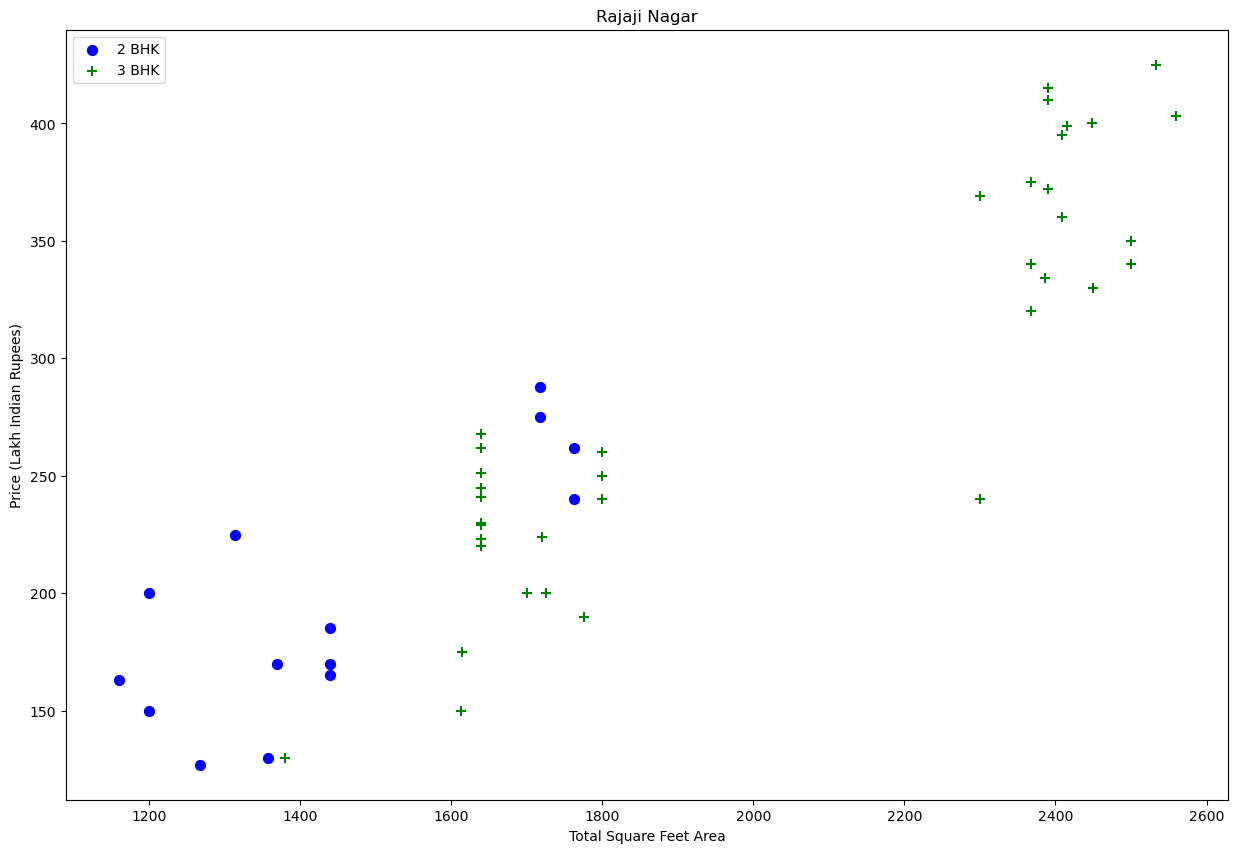

In [57]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    plt.show()
plot_scatter_chart(df5,"Rajaji Nagar")

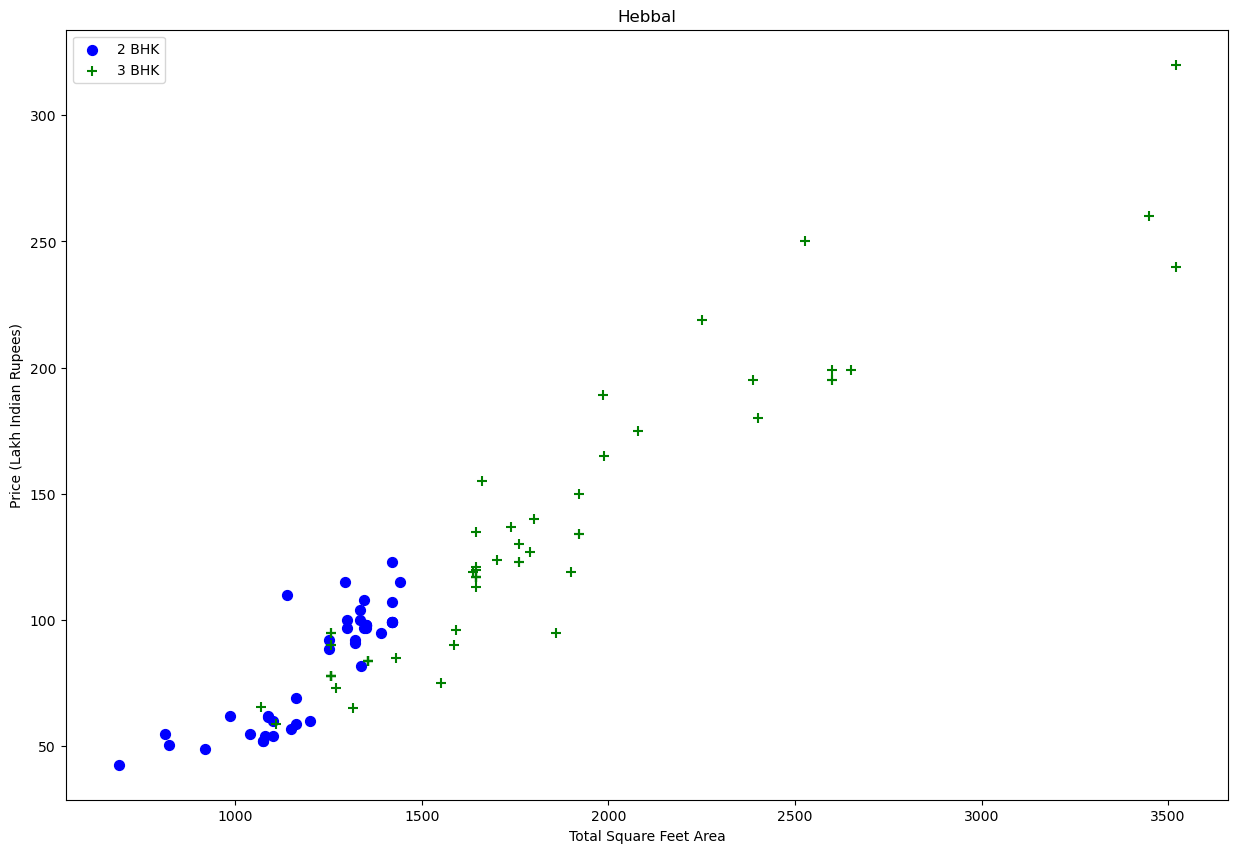

In [58]:
plot_scatter_chart(df5,"Hebbal")

In [59]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
df6.shape

(7331, 6)

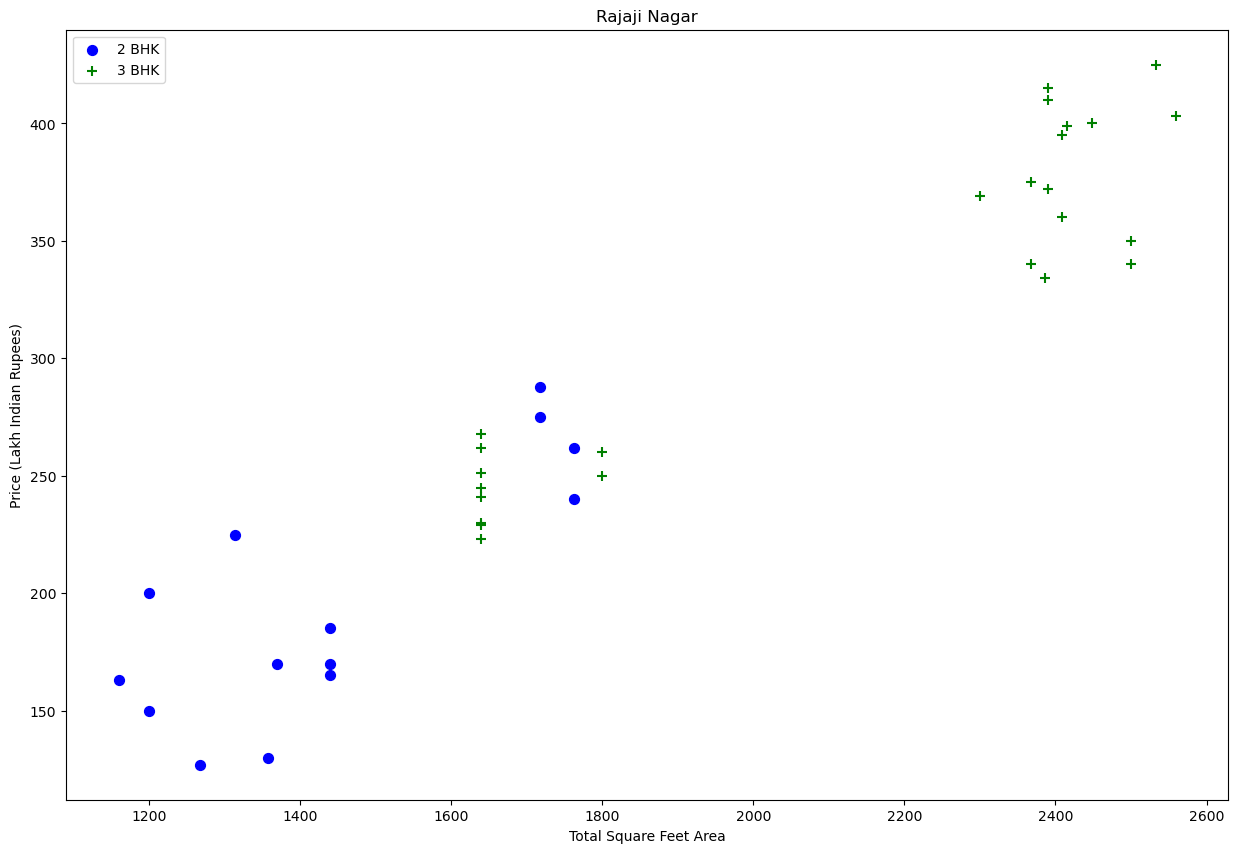

In [60]:
plot_scatter_chart(df6,"Rajaji Nagar")

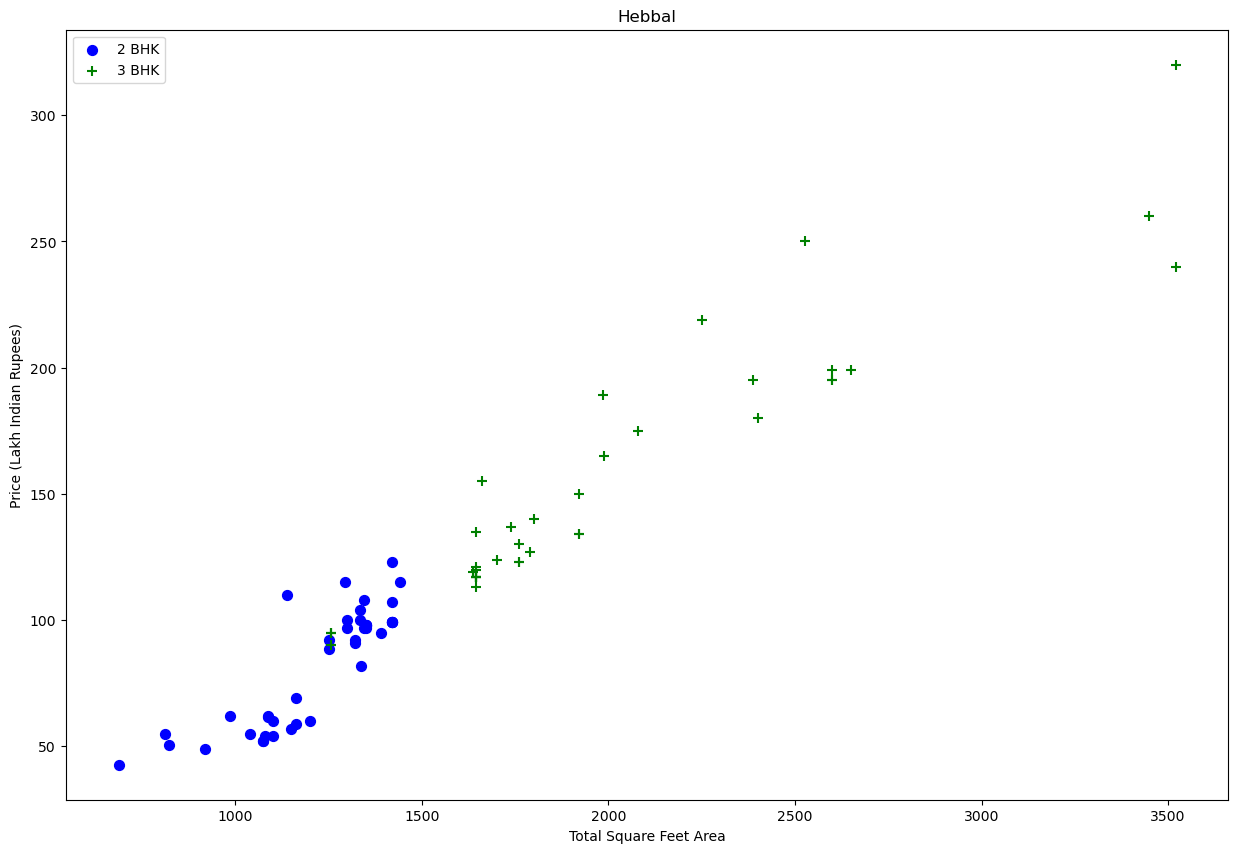

In [61]:
plot_scatter_chart(df6,"Hebbal")

In [64]:
df6[df6.bath>10]

location  total_sqft  bath  price  bhk  price_per_sqft
5271  Neeladri Nagar      4000.0  12.0  160.0   10     4000.000000
8478           other     12000.0  12.0  525.0   10     4375.000000
8567           other     10000.0  16.0  550.0   16     5500.000000
9307           other      6000.0  12.0  150.0   11     2500.000000
9639           other      5425.0  13.0  275.0   13     5069.124424

In [65]:
df6[df6.bath>df6.bhk+2]

location  total_sqft  bath   price  bhk  price_per_sqft
1637  Chikkabanavar      2460.0   7.0    80.0    4     3252.032520
5232     Nagasandra      7000.0   8.0   450.0    4     6428.571429
6702    Thanisandra      1806.0   6.0   116.0    3     6423.034330
8402          other     11338.0   9.0  1000.0    6     8819.897689

In [66]:
df7 = df6[df6.bath<df6.bhk+2]
df7.shape

(7253, 6)

In [83]:
df8 = df7.drop(['price_per_sqft'], axis = 'columns')
df8 = df8.reset_index(drop=True)
df8.head()


location  total_sqft  bath  price  bhk
0   Devarachikkanahalli      1250.0   2.0   40.0    2
1   Devarachikkanahalli      1200.0   2.0   83.0    2
2   Devarachikkanahalli      1170.0   2.0   40.0    2
3   Devarachikkanahalli      1425.0   2.0   65.0    3
4   Devarachikkanahalli       947.0   2.0   43.0    2

In [84]:
dummies = pd.get_dummies(df8.location, dtype=int)
dummies.head()

Devarachikkanahalli  1st Block Jayanagar  1st Phase JP Nagar  \
0                     1                    0                   0   
1                     1                    0                   0   
2                     1                    0                   0   
3                     1                    0                   0   
4                     1                    0                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   5th Phase JP Nagar  6th Phase JP Nagar  7th Phase JP Nagar  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   8th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0                   0  ...                     0                   0   
1                   0  ...                     0                   0   
2                   0  ...                     0                   0   
3                   0  ...                     0                   0   
4                   0  ...                     0                   0   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0            0           0               0          0                   0   
1            0           0               0          0                   0   
2            0           0               0          0                   0   
3            0           0               0          0                   0   
4            0           0               0          0                   0   

   Yelenahalli  Yeshwanthpur  other  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0  

[5 rows x 241 columns]

In [85]:
dummies = dummies.drop('other', axis = 'columns')
df9 = pd.concat([df8, dummies], axis = 'columns')
df9.head()

location  total_sqft  bath  price  bhk   Devarachikkanahalli  \
0   Devarachikkanahalli      1250.0   2.0   40.0    2                     1   
1   Devarachikkanahalli      1200.0   2.0   83.0    2                     1   
2   Devarachikkanahalli      1170.0   2.0   40.0    2                     1   
3   Devarachikkanahalli      1425.0   2.0   65.0    3                     1   
4   Devarachikkanahalli       947.0   2.0   43.0    2                     1   

   1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                    0                   0                          0   
1                    0                   0                          0   
2                    0                   0                          0   
3                    0                   0                          0   
4                    0                   0                          0   

   2nd Stage Nagarbhavi  ...  Vijayanagar  Vishveshwarya Layout  \
0                     0  ...            0                     0   
1                     0  ...            0                     0   
2                     0  ...            0                     0   
3                     0  ...            0                     0   
4                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 245 columns]

In [86]:
df9 = df9.drop('location', axis = 'columns')
df9.head()

total_sqft  bath  price  bhk   Devarachikkanahalli  1st Block Jayanagar  \
0      1250.0   2.0   40.0    2                     1                    0   
1      1200.0   2.0   83.0    2                     1                    0   
2      1170.0   2.0   40.0    2                     1                    0   
3      1425.0   2.0   65.0    3                     1                    0   
4       947.0   2.0   43.0    2                     1                    0   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                   0                          0                     0   
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                     0  ...            0                     0   
1                     0  ...            0                     0   
2                     0  ...            0                     0   
3                     0  ...            0                     0   
4                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 244 columns]

TRAINING & TESTING MODEL

In [87]:
X = df9.drop('price', axis = 'columns')
X.head()

total_sqft  bath  bhk   Devarachikkanahalli  1st Block Jayanagar  \
0      1250.0   2.0    2                     1                    0   
1      1200.0   2.0    2                     1                    0   
2      1170.0   2.0    2                     1                    0   
3      1425.0   2.0    3                     1                    0   
4       947.0   2.0    2                     1                    0   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                   0                          0                     0   
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   

   5th Block Hbr Layout  5th Phase JP Nagar  ...  Vijayanagar  \
0                     0                   0  ...            0   
1                     0                   0  ...            0   
2                     0                   0  ...            0   
3                     0                   0  ...            0   
4                     0                   0  ...            0   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                     0                   0            0           0   
1                     0                   0            0           0   
2                     0                   0            0           0   
3                     0                   0            0           0   
4                     0                   0            0           0   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               0          0                   0            0             0  
1               0          0                   0            0             0  
2               0          0                   0            0             0  
3               0          0                   0            0             0  
4               0          0                   0            0             0  

[5 rows x 243 columns]

In [88]:
y = df9.price
y.head()

0    40.0
1    83.0
2    40.0
3    65.0
4    43.0
Name: price, dtype: float64

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [98]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8401492164053457

In [99]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84014922, 0.78873287, 0.86373278, 0.86871995, 0.88094502])

In [102]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index>=0:
        x[loc_index]=1
    x_df = pd.DataFrame([x], columns=X.columns)
    return lr_clf.predict(x_df)[0]

In [103]:
predict_price('Indira Nagar', 1000,2,2)

np.float64(173.75105826806538)

In [104]:
import pickle
with open('banglore_home_prediction_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [106]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))